# Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


In [2]:
df=pd.read_csv('/kaggle/input/d/anishkulkarni223/hr-data/HR_comma_sep.csv')

In [3]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

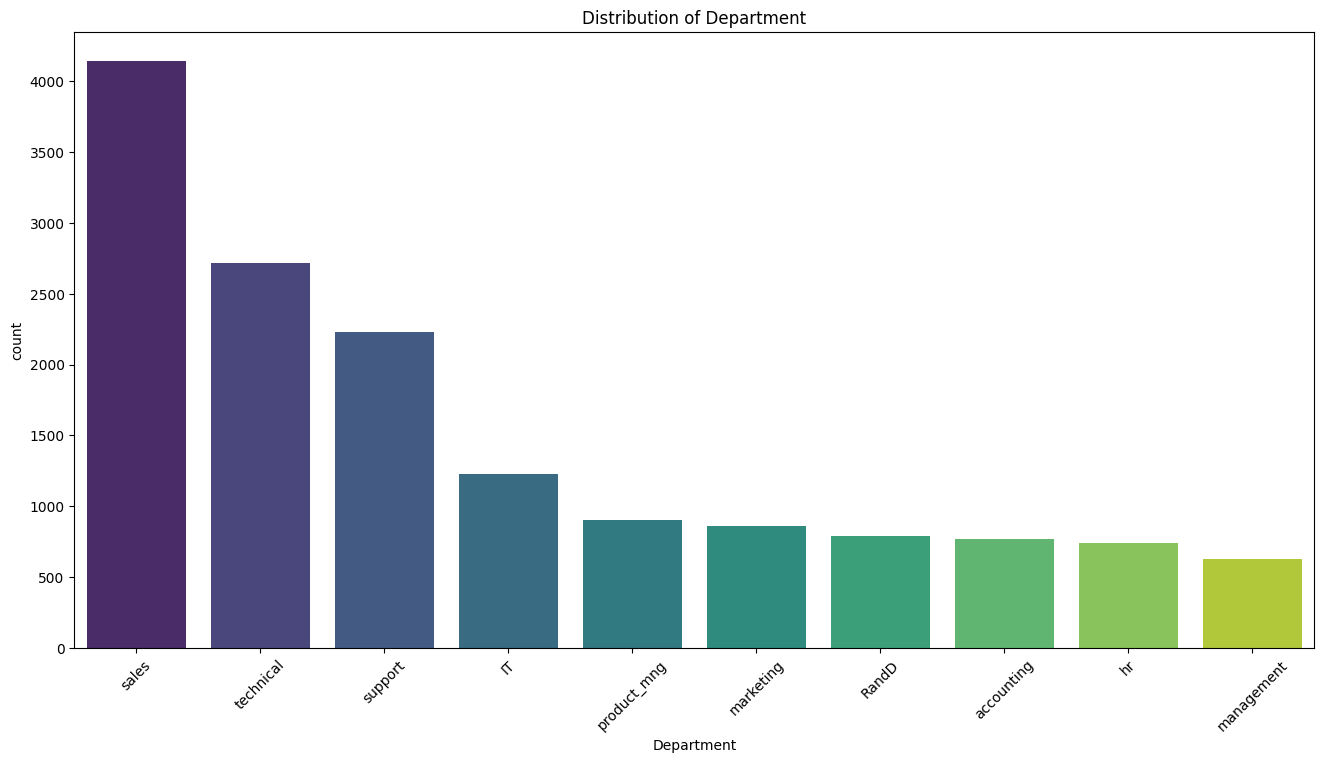

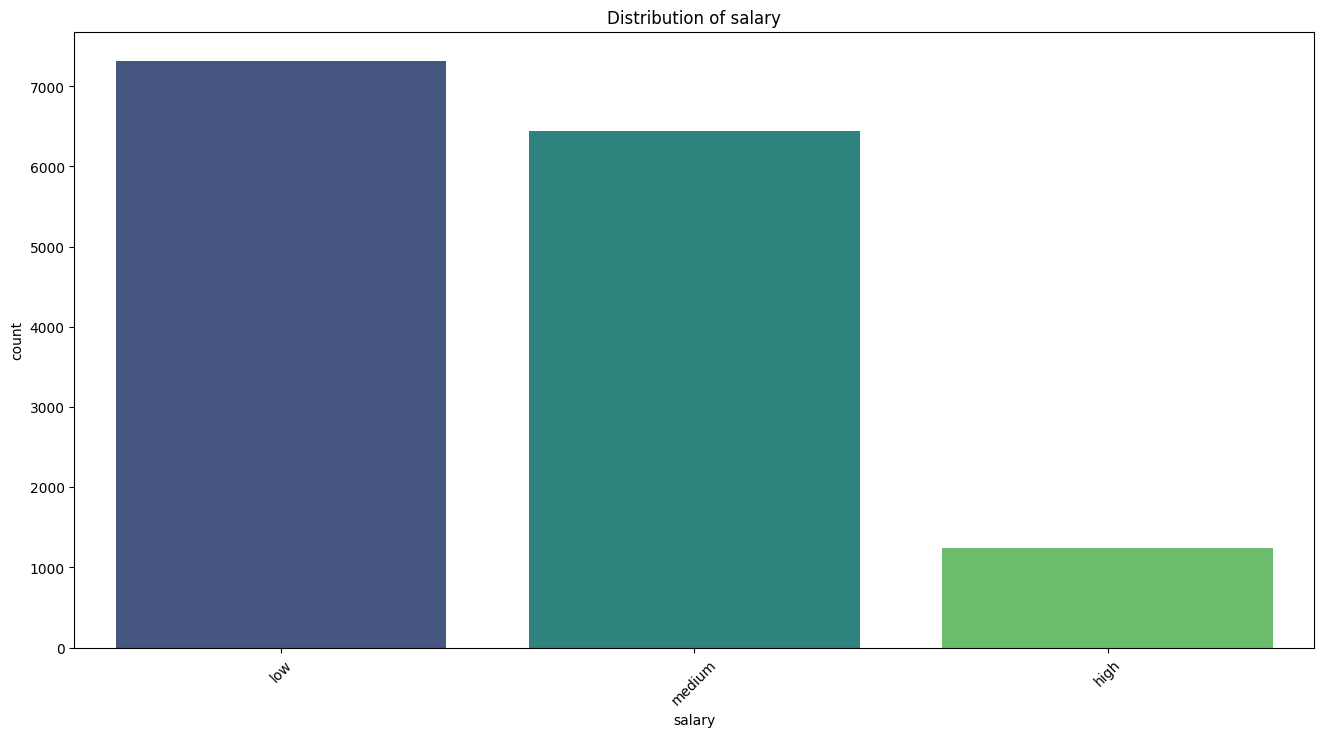

In [8]:
categorical_col=['Department','salary']
for col in categorical_col:
    plt.figure(figsize=(16,8))
    sns.countplot(data=df,x=col,palette="viridis",order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

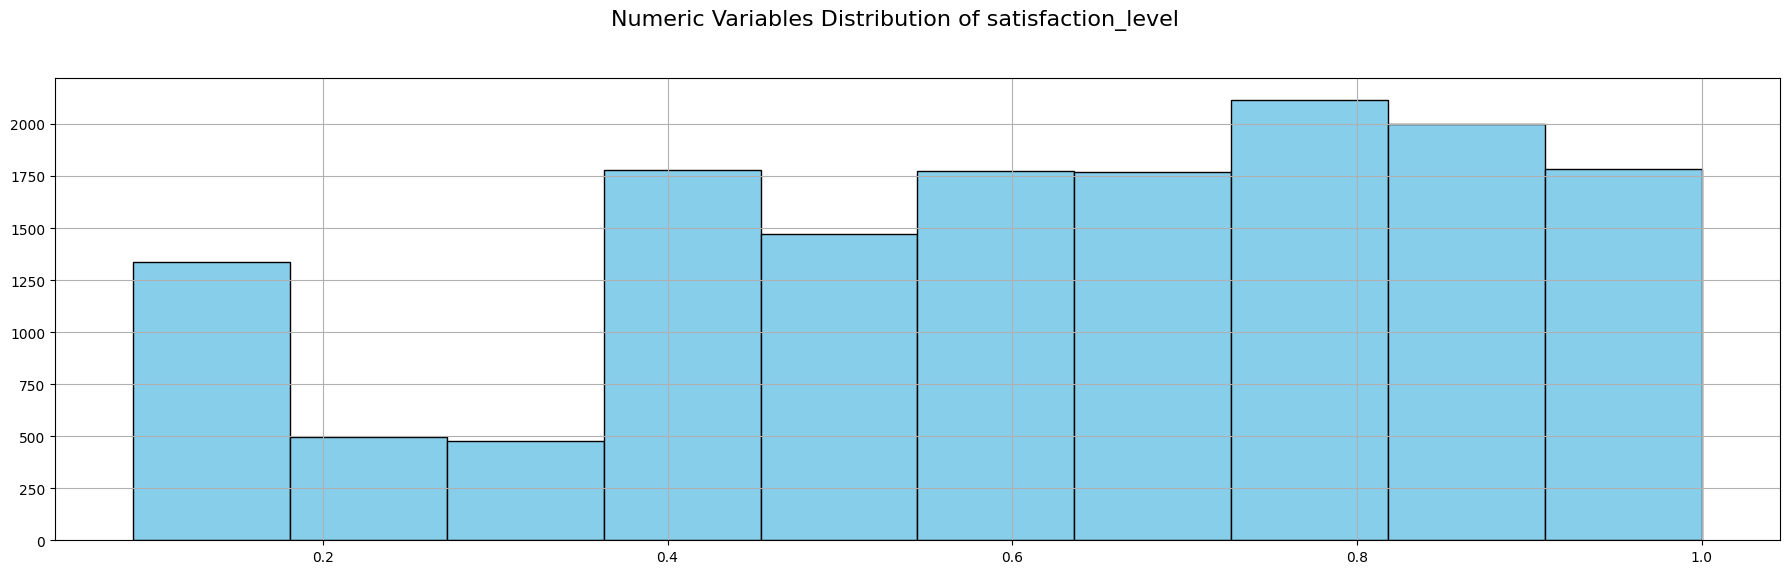

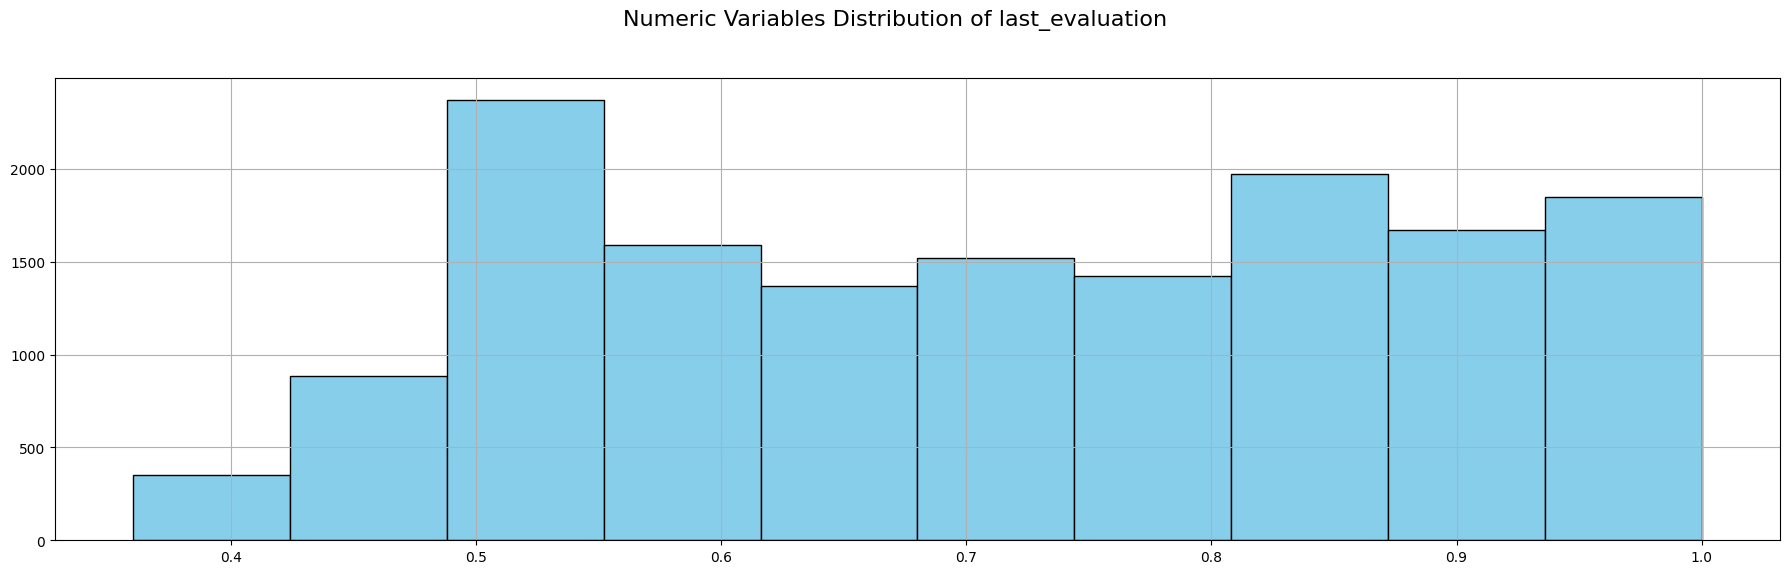

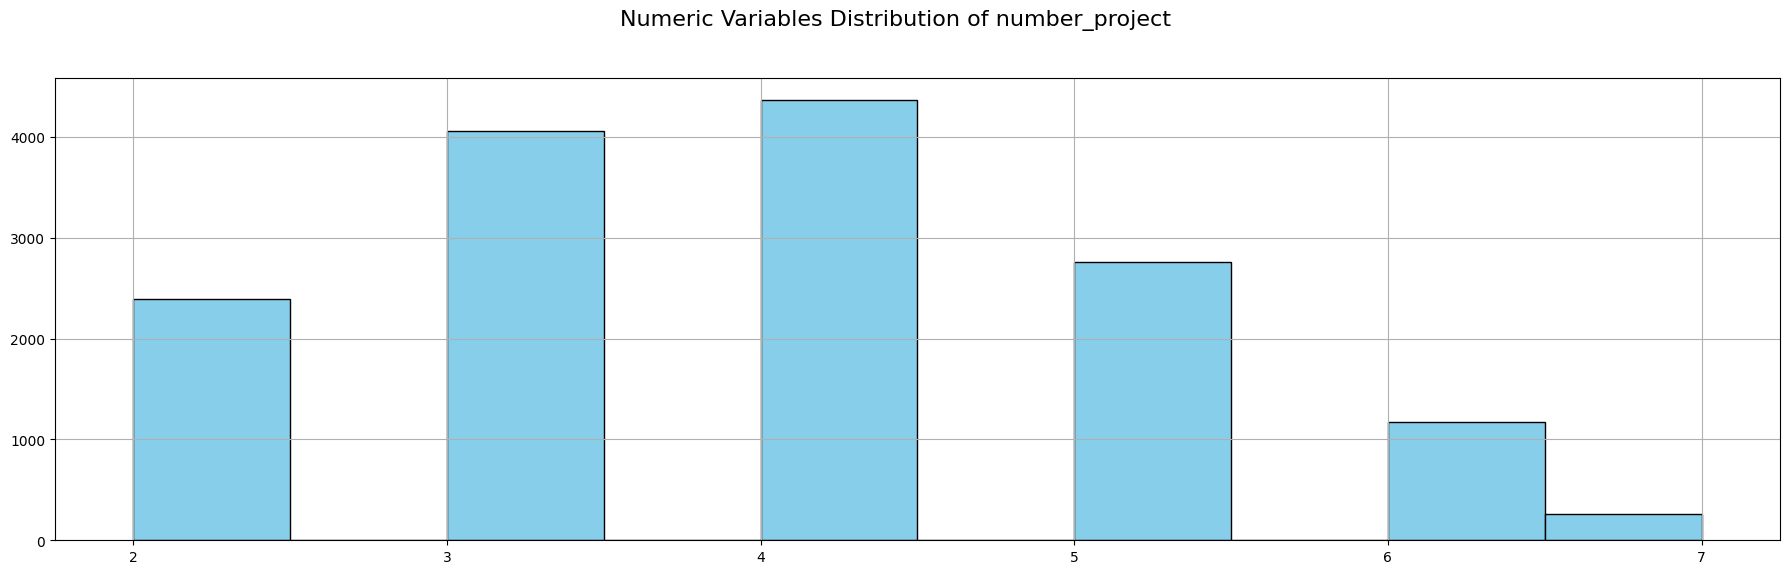

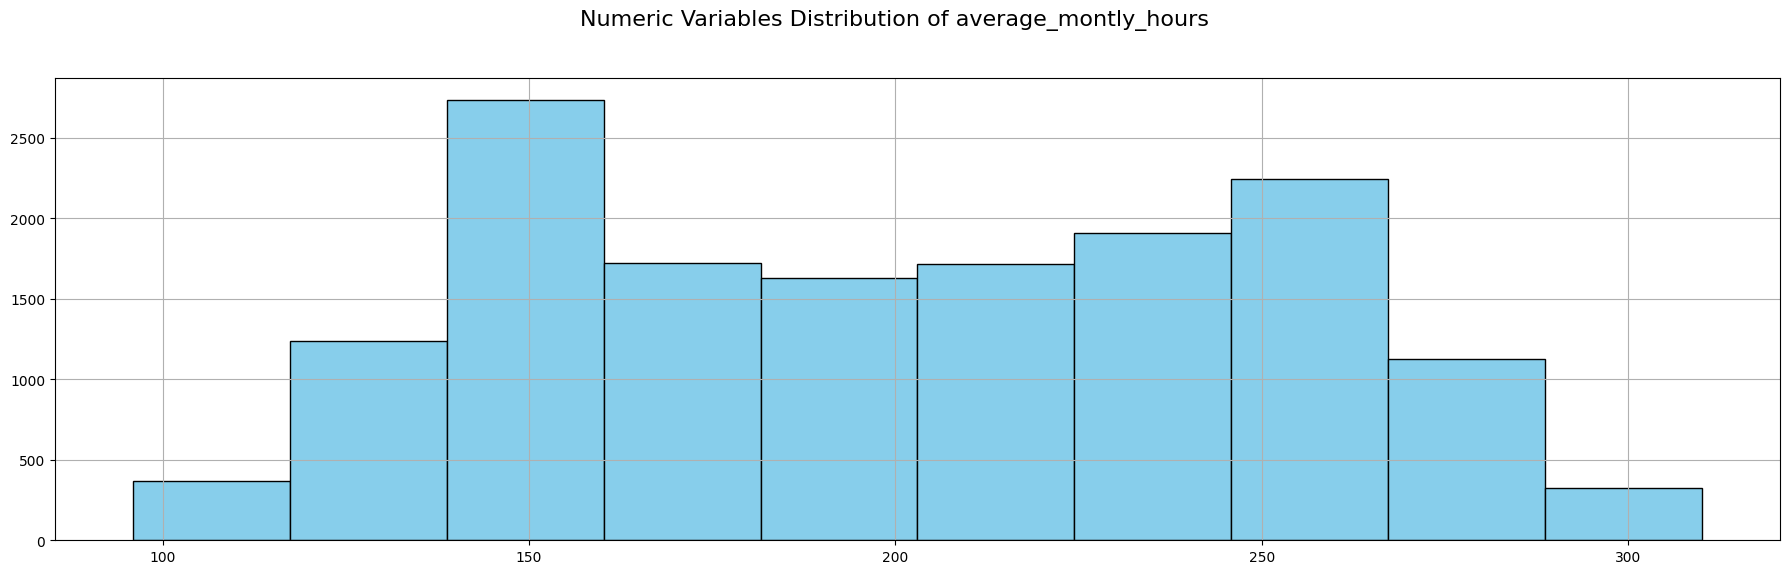

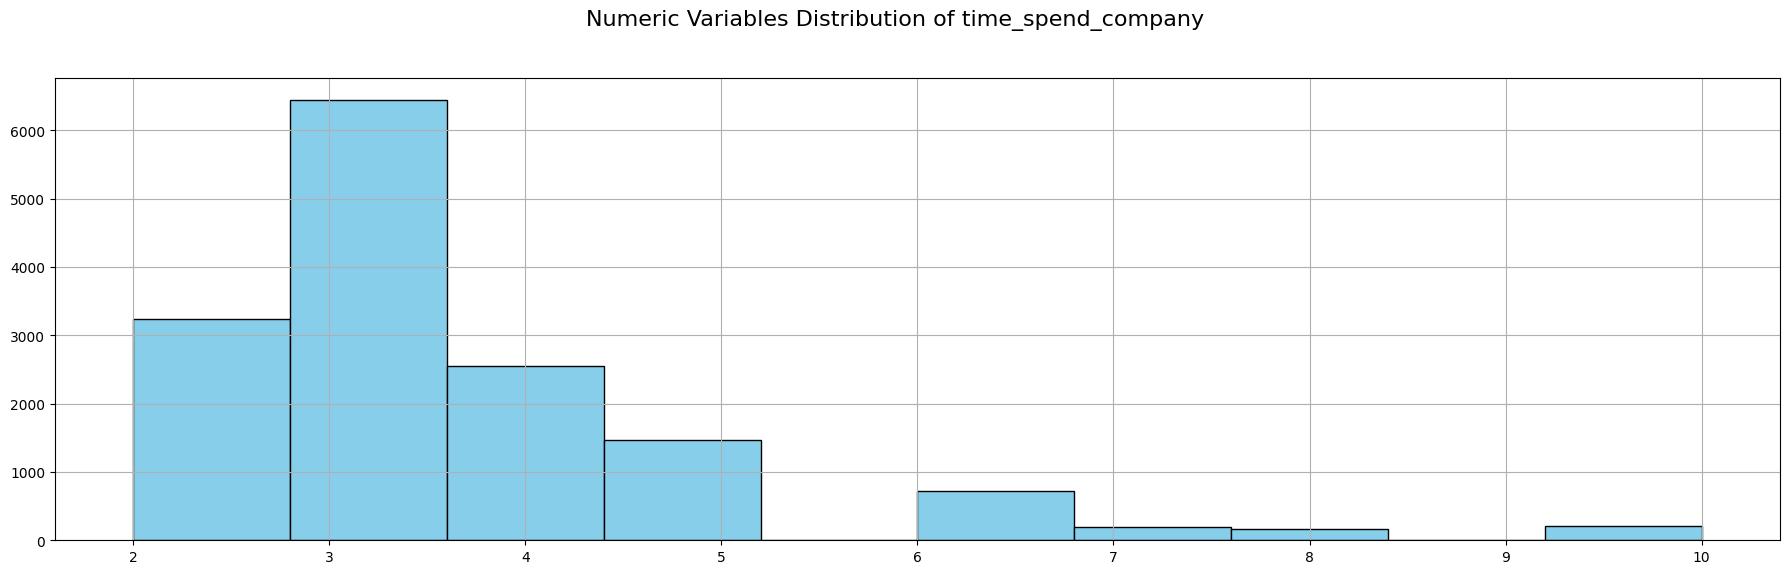

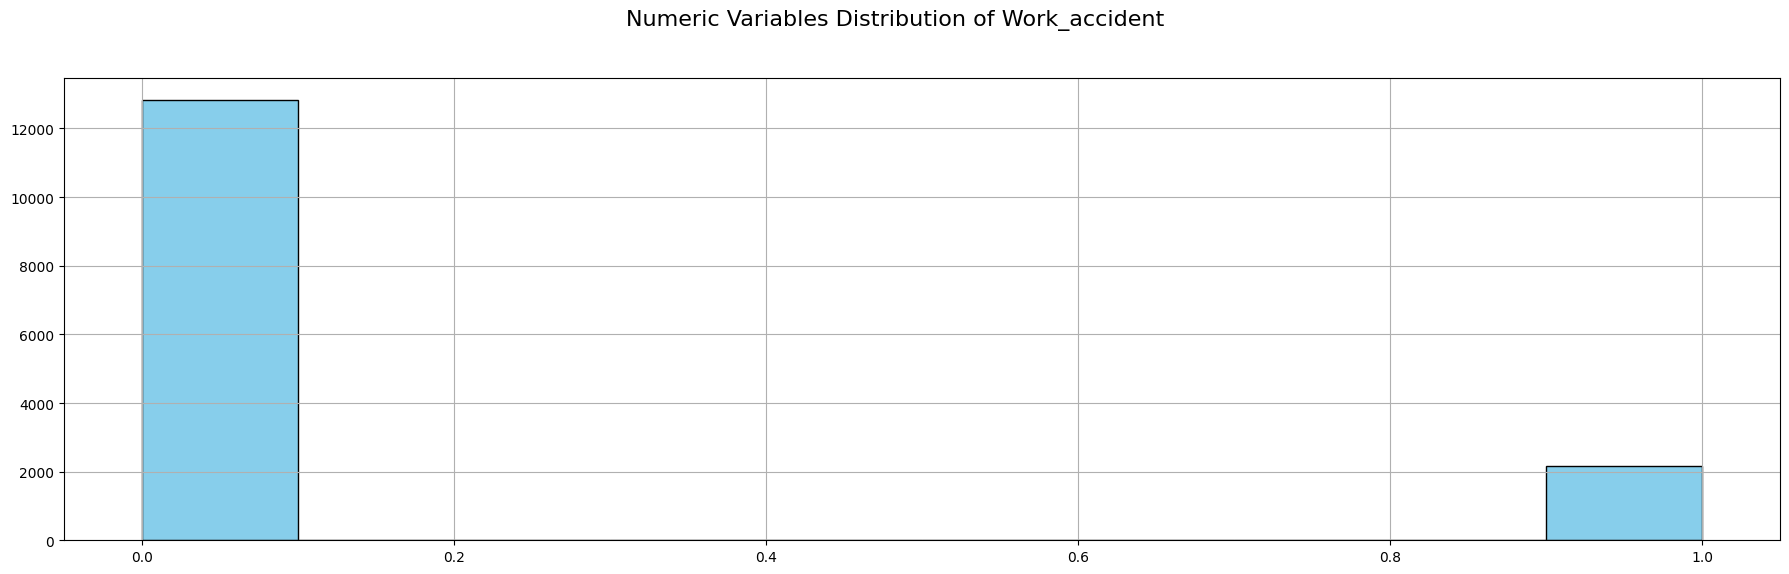

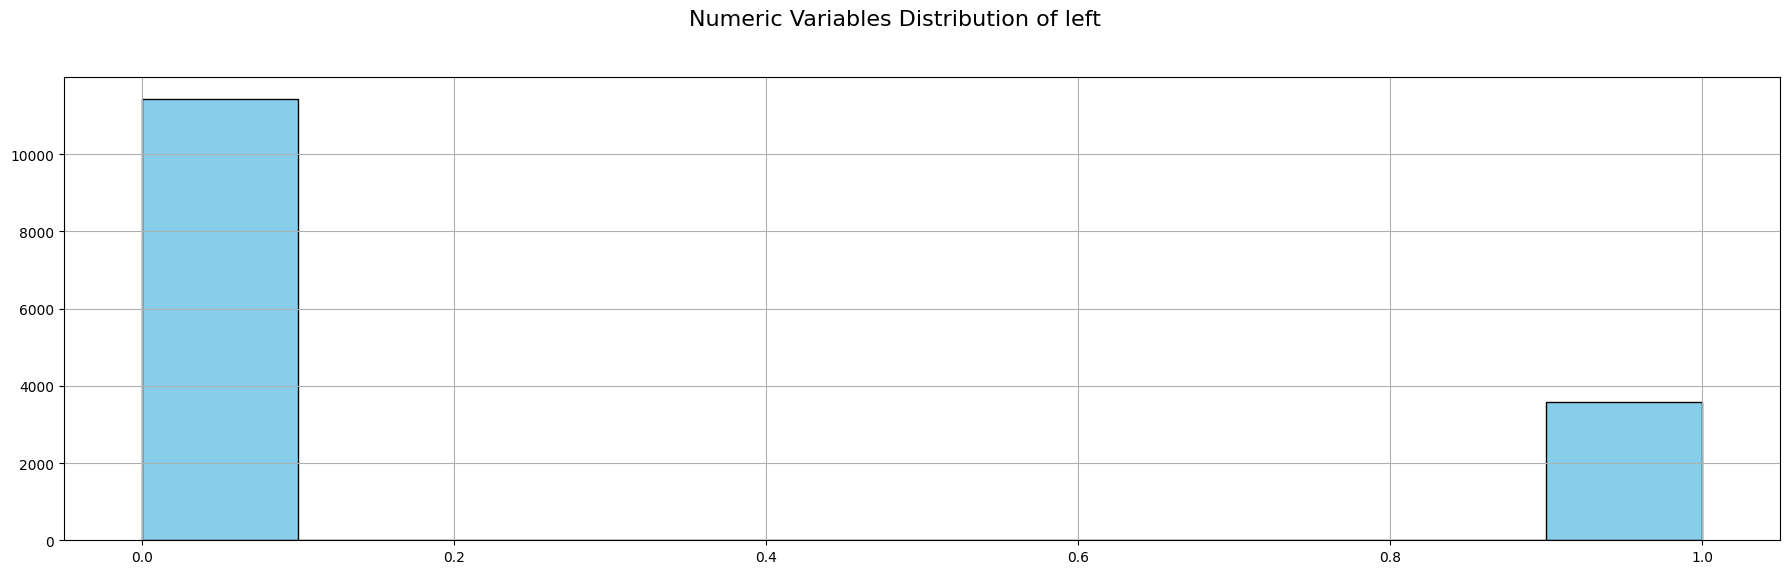

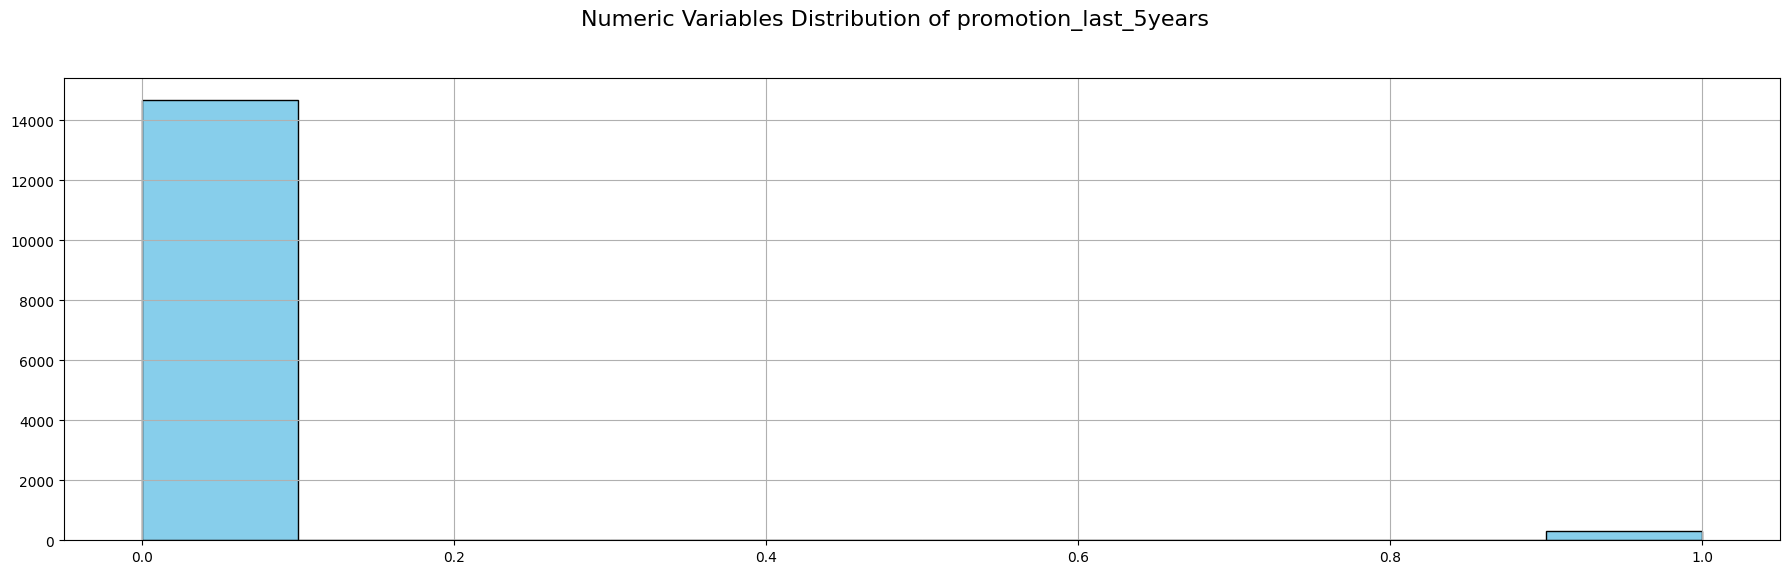

In [9]:
numerical_col=['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', ]
for col in numerical_col:
    plt.figure(figsize=(16,8))
    df[col].hist(figsize=(18,6),bins=10,color='skyblue',edgecolor='black')
    plt.suptitle(f"Numeric Variables Distribution of {col}", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Exploratory Data Analysis(EDA)- Correlation analysis

<Axes: >

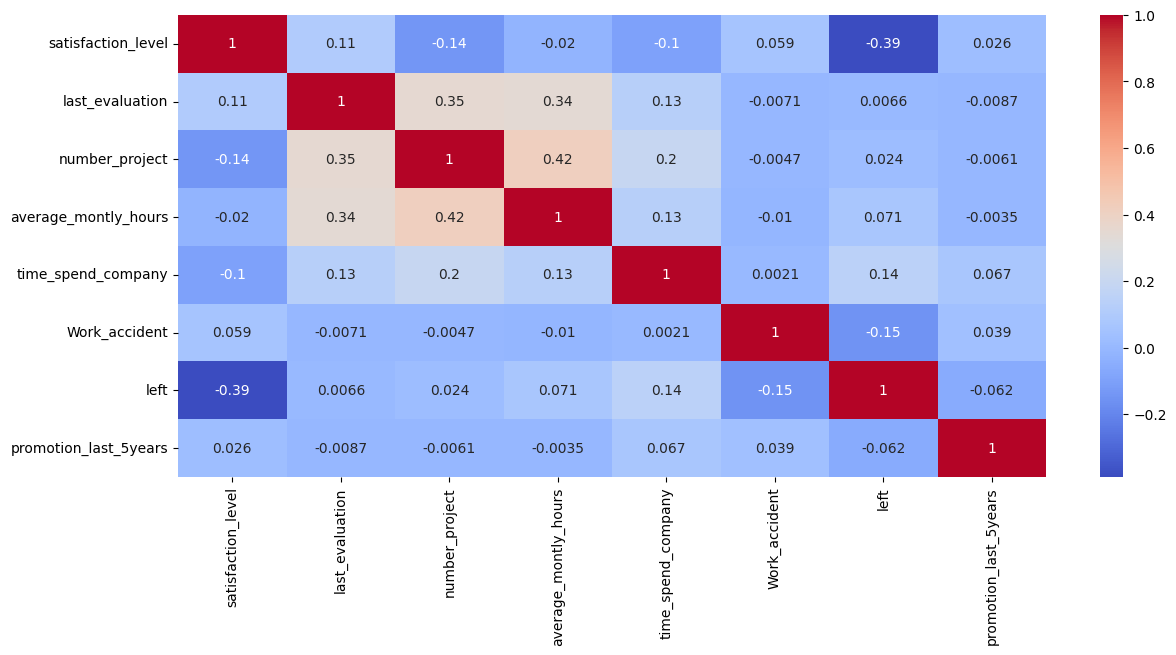

In [10]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(numeric_only=True),cmap='coolwarm',annot=True)

# Data Preprocessing

In [11]:
df[['RandD', 'accounting', 'hr', 'management', 'marketing', 'product_mng',
       'sales', 'support', 'technical']]=pd.get_dummies(df['Department'],drop_first=True,dtype=int)

In [12]:
df.drop('Department',axis=1,inplace=True)

In [13]:
le=LabelEncoder()

In [14]:
df['salary']=le.fit_transform(df['salary'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  int64  
 9   RandD                  14999 non-null  int64  
 10  accounting             14999 non-null  int64  
 11  hr                     14999 non-null  int64  
 12  management             14999 non-null  int64  
 13  marketing              14999 non-null  int64  
 14  product_mng            14999 non-null  int64  
 15  sa

# Splitting data into training and test data

In [16]:
X=df.drop('salary',axis=1)
y=df['salary']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=91)

# Evaluating various ML models

In [18]:
models={
    "Logistic Regression":LogisticRegression(max_iter=10000,random_state=42),
    "Random Forest":RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine":SVC(random_state=42),
    "Naive Bayes":MultinomialNB()
}
def evaluate_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)    
    precision=precision_score(y_test,y_pred, average='weighted', zero_division=0)
    recall=recall_score(y_test,y_pred, average='weighted', zero_division=0)
    f1=f1_score(y_test,y_pred, average='weighted', zero_division=0)

    return accuracy,precision,f1,recall

In [19]:
results=[]
for name,model in models.items():
    accuracy,precision,f1,recall=evaluate_model(model,X_train,y_train,X_test,y_test)
    results.append({
        "Model":name,
        "Accuracy":accuracy,
        "Precision":precision,
        "F1-Score":f1,
        "Recall":recall
    })
results_df=pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,F1-Score,Recall
0,Logistic Regression,0.501333,0.489575,0.470757,0.501333
1,Random Forest,0.640333,0.647503,0.635891,0.640333
2,Support Vector Machine,0.494667,0.244695,0.327424,0.494667
3,Naive Bayes,0.500333,0.483075,0.450293,0.500333



Best Model (Machine Learning):
Model        Random Forest
Accuracy          0.640333
Precision         0.647503
F1-Score          0.635891
Recall            0.640333
Name: 1, dtype: object


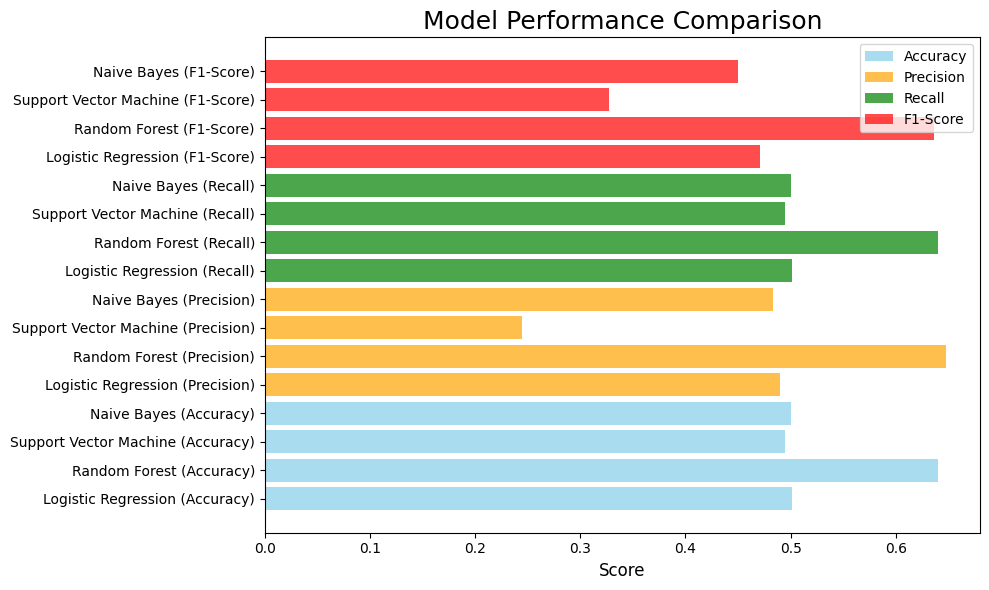


Optimal Model based on Accuracy: Random Forest with Accuracy = 0.6403


In [20]:
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print("\nBest Model (Machine Learning):")
print(best_model)

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
colors = ["skyblue", "orange", "green", "red"]

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.barh(results_df['Model'] + f" ({metric})", results_df[metric], color=colors[i], alpha=0.7, label=metric)

ax.set_xlabel("Score", fontsize=12)
ax.set_title("Model Performance Comparison", fontsize=18)
ax.legend()
plt.tight_layout()
plt.show()

print(f"\nOptimal Model based on Accuracy: {best_model['Model']} with Accuracy = {best_model['Accuracy']:.4f}")

# Applying Random Forest 

In [21]:
rf=RandomForestClassifier()

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

from sklearn.metrics import classification_report
print('***** Random Forest *****')
print(classification_report(y_test,y_pred))

***** Random Forest *****
              precision    recall  f1-score   support

           0       0.74      0.35      0.48       253
           1       0.66      0.71      0.68      1484
           2       0.61      0.61      0.61      1263

    accuracy                           0.64      3000
   macro avg       0.67      0.56      0.59      3000
weighted avg       0.64      0.64      0.64      3000



# Confusion Matrix of best model

In [22]:
cm = confusion_matrix(y_test, y_pred)


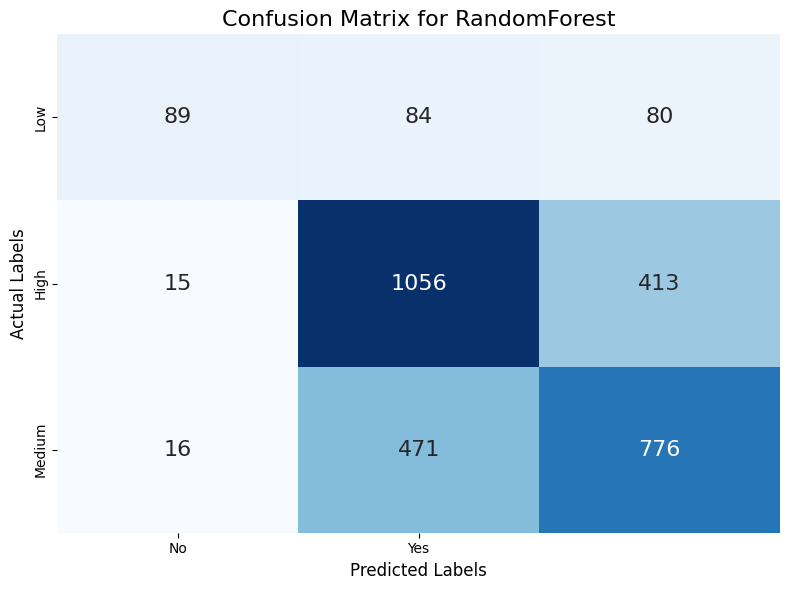

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], 
            yticklabels=["Low", "High","Medium"], cbar=False, annot_kws={"size": 16})

plt.title("Confusion Matrix for RandomForest", fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('Actual Labels', fontsize=12)
plt.tight_layout()
plt.show()